<a href="https://colab.research.google.com/github/batuhanbaydr/DSA210-Term-Project/blob/main/notebooks/Unsupervised_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pathlib, subprocess, os
REPO = "/content/DSA210-Term-Project"
if not pathlib.Path(REPO).exists():
    !git clone -q https://github.com/batuhanbaydr/DSA210-Term-Project.git {REPO}
%cd {REPO}
!pip -q install pandas scikit-learn seaborn matplotlib pyarrow

/content/DSA210-Term-Project


<ipython-input-3-fe6ad5b829c4>:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[col] = X[col].fillna(False).astype(int)


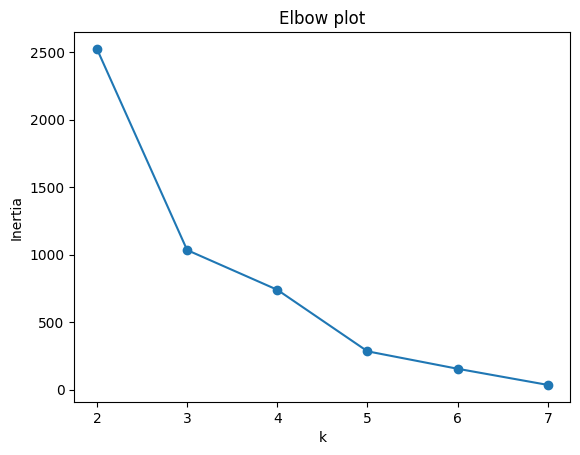

Silhouette: 0.835


,political_theme,bechdel_pass,winner
cluster,,,
0,0.047996,0.0,0.000000
1,0.068654,0.0,1.000000
2,0.069319,1.0,0.234344


In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

df = pd.read_parquet("data/processed/oscars_plus_bechdel_pol.parquet")

X = df[["political_theme", "bechdel_pass", "winner"]].copy()
for col in ["political_theme", "bechdel_pass"]:
    X[col] = X[col].fillna(False).astype(int)
X["winner"] = X["winner"].astype(int)

# elbow plot
ss = []
K  = range(2,8)
for k in K:
    km = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X)
    ss.append(km.inertia_)
plt.plot(K, ss, marker="o"); plt.xlabel("k"); plt.ylabel("Inertia")
plt.title("Elbow plot"); plt.show()

# choose k=3 for demo
km = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X)
df["cluster"] = km.labels_

print("Silhouette:", round(silhouette_score(X, km.labels_),3))
df.groupby("cluster")[["political_theme","bechdel_pass","winner"]].mean()

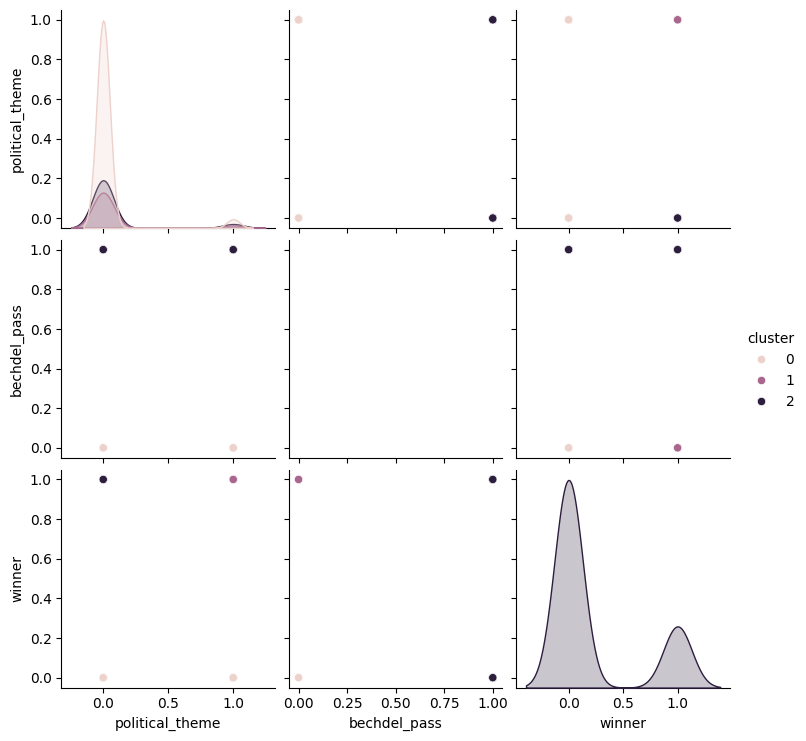

In [4]:
import seaborn as sns
sns.pairplot(
    df.sample(1500),   # downsample for speed
    vars=["political_theme","bechdel_pass","winner"],
    hue="cluster"
)
plt.show()